# Preprocessing

## Exploring Data

* We start by importing libraries and data into our notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/rahulwankhade/Downloads/ML case Study.csv', header = 0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.shape

(1589, 8)

In [5]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


* Now we need to load college data and city data and sort them.

In [6]:
college = pd.read_csv('/Users/rahulwankhade/Downloads/Colleges.csv', header = 0)

In [7]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [8]:
Tier1 = college["Tier 1"].tolist()
Tier2= college["Tier 2"].tolist()
Tier3= college["Tier 3"].tolist()

In [9]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [10]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace=True)
        

In [11]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10
5,2,Kolhapur,Executive,54340.0,4,73,31,59950.89
6,3,Surat,Executive,60298.0,1,42,46,66602.34
7,2,Delhi,Executive,49944.0,2,56,37,57768.44
8,3,Chennai,Executive,53124.0,4,40,37,70083.30
9,1,Kolhapur,Executive,51141.0,1,47,60,85648.48


In [12]:
city = pd.read_csv('/Users/rahulwankhade/Downloads/cities.csv', header=0)

In [13]:
city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [14]:
metro = city["Metrio City"].tolist()
non_metro = city["non-metro cities"].tolist()

In [15]:
metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [16]:
for item in df.City:
    if item in metro:
        df["City"].replace(item, 'metro',inplace=True)
    elif item in non_metro:
        df["City"].replace(item,'non_metro',inplace=True)

In [17]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,non_metro,Manager,55523.0,3,66,19,71406.58
1,2,non_metro,Executive,57081.0,1,84,18,68005.87
2,3,non_metro,Executive,60347.0,2,52,28,76764.02
3,3,non_metro,Executive,49010.0,2,81,33,82092.39
4,1,non_metro,Executive,57879.0,4,74,32,73878.10
5,2,non_metro,Executive,54340.0,4,73,31,59950.89
6,3,metro,Executive,60298.0,1,42,46,66602.34
7,2,metro,Executive,49944.0,2,56,37,57768.44
8,3,metro,Executive,53124.0,4,40,37,70083.30
9,1,non_metro,Executive,51141.0,1,47,60,85648.48


In [18]:
df.shape

(1589, 8)

In [19]:
df.describe()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


* Let's plot the graph for Independent variables with the dependent variable to exlpore the data

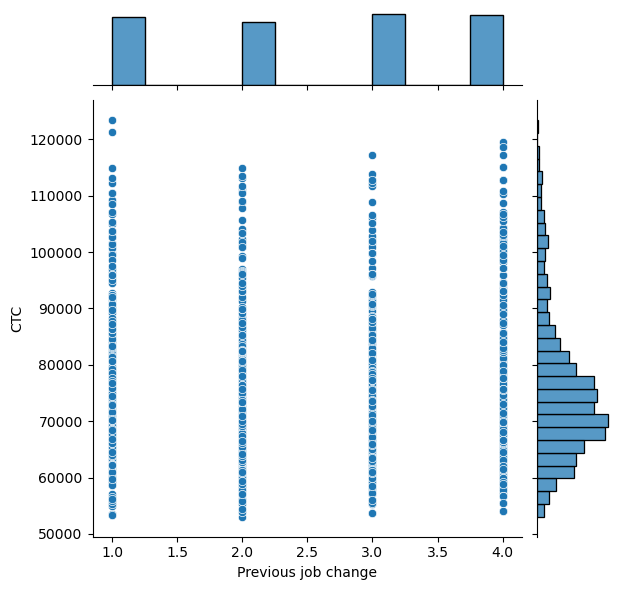

In [20]:
sns.jointplot(x='Previous job change', y= 'CTC', data=df)

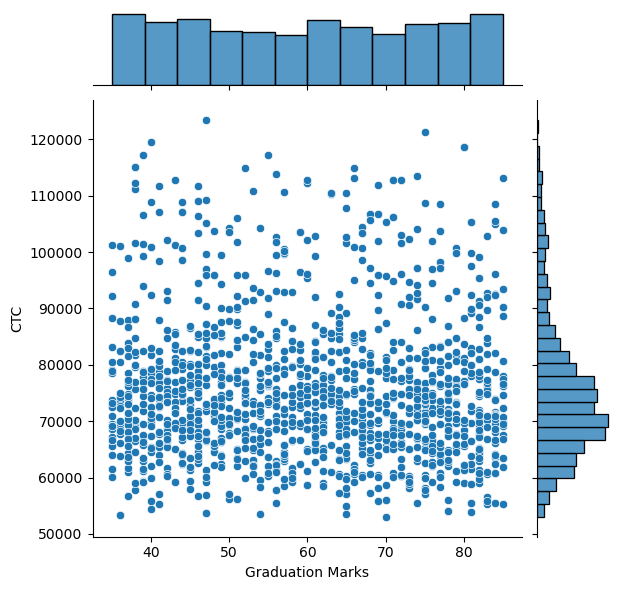

In [21]:
sns.jointplot(x='Graduation Marks', y= 'CTC', data=df)

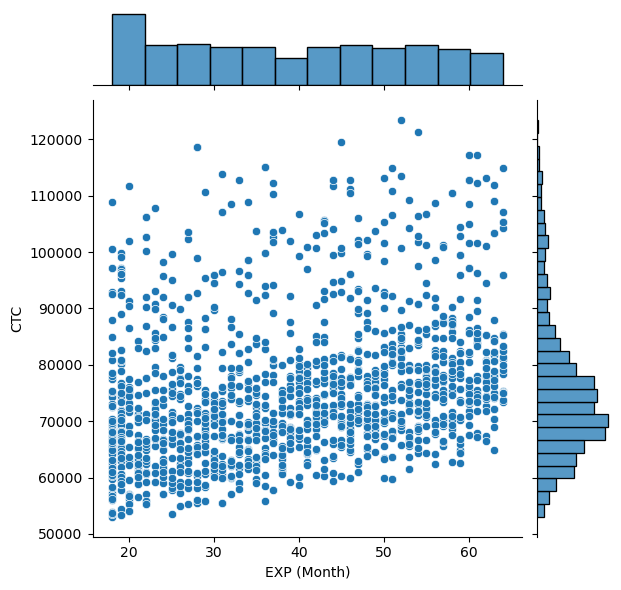

In [22]:
sns.jointplot(x='EXP (Month)', y= 'CTC', data=df)

<Axes: xlabel='College', ylabel='count'>

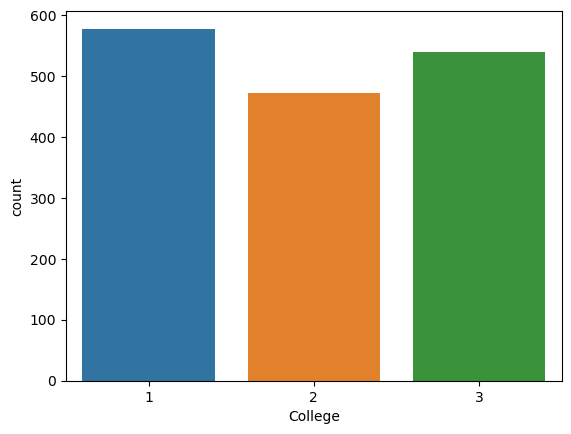

In [23]:
sns.countplot(x='College',data=df)

<Axes: xlabel='City', ylabel='count'>

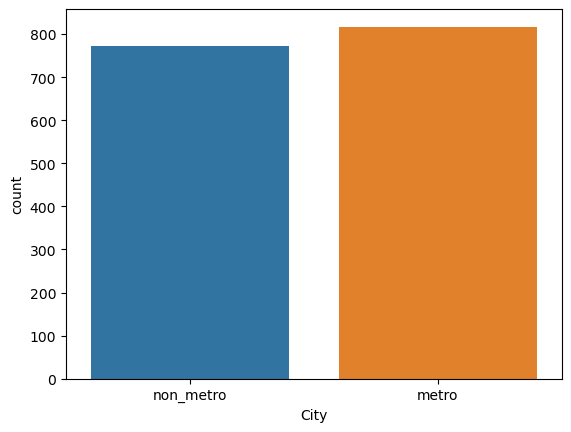

In [24]:
sns.countplot(x='City',data=df)

* all graphs seem linear in nature
* outliers can be capped at 99 percentile itself
* missing values are not found

## Outlier treatment

In [25]:
uv= np.percentile(df['Previous CTC'],[99])[0]

In [26]:
df[(df['Previous CTC']>uv)]

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
116,3,metro,Executive,77911.0,1,50,58,87831.62
292,3,non_metro,Manager,74198.0,1,57,25,99644.51
543,1,metro,Manager,73856.0,1,75,54,121362.73
572,1,metro,Executive,71543.0,4,82,30,61366.78
701,2,non_metro,Executive,71549.0,4,47,50,83116.21
847,1,metro,Executive,71756.0,4,67,23,72141.43
860,1,metro,Manager,75785.0,4,63,37,110338.25
941,3,metro,Executive,72319.0,1,51,50,63538.43
1024,1,metro,Executive,72661.0,3,74,47,70238.70
1047,1,non_metro,Manager,73214.0,4,57,22,100119.53


In [27]:
df['Previous CTC'][df['Previous CTC'] > uv] = uv

/var/folders/jb/hc05xk5x3nbccgmdfflqbj300000gn/T/ipykernel_5351/1963914092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Previous CTC'][df['Previous CTC'] > uv] = uv


## get dummy variables

In [28]:
df = pd.get_dummies(df)

In [29]:
df.head(10)

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,City_non_metro,Role_Executive,Role_Manager
0,2,55523.0,3,66,19,71406.58,0,1,0,1
1,2,57081.0,1,84,18,68005.87,0,1,1,0
2,3,60347.0,2,52,28,76764.02,0,1,1,0
3,3,49010.0,2,81,33,82092.39,0,1,1,0
4,1,57879.0,4,74,32,73878.10,0,1,1,0
5,2,54340.0,4,73,31,59950.89,0,1,1,0
6,3,60298.0,1,42,46,66602.34,1,0,1,0
7,2,49944.0,2,56,37,57768.44,1,0,1,0
8,3,53124.0,4,40,37,70083.30,1,0,1,0
9,1,51141.0,1,47,60,85648.48,0,1,1,0


* we did not make dummy variables for college since college tiers are hierarchical in nature
* now we delete extra dummy variables

In [30]:
del df['City_non_metro']
del df['Role_Executive']

In [31]:
df.head()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,Role_Manager
0,2,55523.0,3,66,19,71406.58,0,1
1,2,57081.0,1,84,18,68005.87,0,0
2,3,60347.0,2,52,28,76764.02,0,0
3,3,49010.0,2,81,33,82092.39,0,0
4,1,57879.0,4,74,32,73878.10,0,0


In [32]:
df.corr()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_metro,Role_Manager
College,1.000000,0.042781,-0.055060,0.003539,0.011752,-0.029592,-0.014946,-0.014749
Previous CTC,0.042781,1.000000,0.006994,-0.032850,0.119261,0.256969,0.002734,0.011804
Previous job change,-0.055060,0.006994,1.000000,0.019267,0.023488,0.011370,0.051670,-0.017150
Graduation Marks,0.003539,-0.032850,0.019267,1.000000,-0.057061,-0.005450,-0.018616,0.017858
EXP (Month),0.011752,0.119261,0.023488,-0.057061,1.000000,0.301115,-0.023613,-0.026751
CTC,-0.029592,0.256969,0.011370,-0.005450,0.301115,1.000000,-0.020365,0.621311
City_metro,-0.014946,0.002734,0.051670,-0.018616,-0.023613,-0.020365,1.000000,-0.048671
Role_Manager,-0.014749,0.011804,-0.017150,0.017858,-0.026751,0.621311,-0.048671,1.000000


* correlation between independent variables is less
* correlation between CTC and independent variable is also low for many cases but we have limited independent variable so deleting one would affect the accuracy of the model

# Linear Regression

* To get a basic idea of the r2 score let's start with a simple Linear Regression model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
x_multi = df.drop("CTC", axis=1)

In [35]:
x_multi.head()

,College,Previous CTC,Previous job change,Graduation Marks,EXP (Month),City_metro,Role_Manager
0,2,55523.0,3,66,19,0,1
1,2,57081.0,1,84,18,0,0
2,3,60347.0,2,52,28,0,0
3,3,49010.0,2,81,33,0,0
4,1,57879.0,4,74,32,0,0


In [36]:
y_multi = df['CTC']

In [37]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

* Create a train test split for testing data on a different data set than one it was trained with

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 0)

In [40]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


* Create a linear Regresssion model and fit the training data into it

In [41]:
lm_a = LinearRegression()

In [42]:
lm_a.fit(x_train, y_train)

LinearRegression()

* Check the r2 score for the model

In [43]:
y_test_a = lm_a.predict(x_test)

In [44]:
y_train_a = lm_a.predict(x_train)

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test, y_test_a)

0.5356339992547647

In [47]:
r2_score(y_train, y_train_a)

0.5327443835281036

# Ridge Regression

* To improve the r2 score we can use Ridge regression to prevent overfitting.
* We are using Ridge Regression over Lasso since we want to avoid removing features. Lasso can set coefficients to exact zero.
* Before using Ridge Regression we need to scale the data

In [48]:
from sklearn import preprocessing

In [49]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [50]:
x_train_s = scaler.transform(x_train)

In [51]:
x_test_s = scaler.transform(x_test)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(x_train_s, y_train)

Ridge(alpha=0.5)

In [54]:
r2_score(y_test, lm_r.predict(x_test_s))

0.5356201631450692

* The r2 score is almost same to the OLS model. So we use the validation curve to find the best value for lamda

In [55]:
from sklearn.model_selection import validation_curve

* We create a range for parameters

In [56]:
param_range = np.logspace(-2,8,100)

In [57]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

* Split train-test data and fit it into the validation curve

In [58]:
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [59]:
print(train_scores)
print(test_scores)

[[5.25977338e-01 5.32965971e-01 5.39425581e-01 5.37546184e-01
  5.30105178e-01]
 [5.25977338e-01 5.32965971e-01 5.39425581e-01 5.37546184e-01
  5.30105178e-01]
 [5.25977338e-01 5.32965971e-01 5.39425581e-01 5.37546184e-01
  5.30105178e-01]
 [5.25977338e-01 5.32965970e-01 5.39425581e-01 5.37546184e-01
  5.30105178e-01]
 [5.25977338e-01 5.32965970e-01 5.39425581e-01 5.37546183e-01
  5.30105178e-01]
 [5.25977338e-01 5.32965970e-01 5.39425581e-01 5.37546183e-01
  5.30105178e-01]
 [5.25977338e-01 5.32965970e-01 5.39425580e-01 5.37546183e-01
  5.30105177e-01]
 [5.25977337e-01 5.32965969e-01 5.39425580e-01 5.37546182e-01
  5.30105177e-01]
 [5.25977336e-01 5.32965969e-01 5.39425579e-01 5.37546182e-01
  5.30105176e-01]
 [5.25977335e-01 5.32965968e-01 5.39425578e-01 5.37546180e-01
  5.30105175e-01]
 [5.25977333e-01 5.32965966e-01 5.39425576e-01 5.37546178e-01
  5.30105173e-01]
 [5.25977330e-01 5.32965963e-01 5.39425573e-01 5.37546175e-01
  5.30105170e-01]
 [5.25977325e-01 5.32965958e-01 5.394255

In [60]:
train_mean = np.mean(train_scores, axis = 1)

In [61]:
test_mean =np.mean(test_scores, axis=1)

In [62]:
train_mean

array([5.33204050e-01, 5.33204050e-01, 5.33204050e-01, 5.33204050e-01,
       5.33204050e-01, 5.33204050e-01, 5.33204050e-01, 5.33204049e-01,
       5.33204048e-01, 5.33204047e-01, 5.33204045e-01, 5.33204042e-01,
       5.33204038e-01, 5.33204030e-01, 5.33204018e-01, 5.33203998e-01,
       5.33203967e-01, 5.33203918e-01, 5.33203840e-01, 5.33203716e-01,
       5.33203518e-01, 5.33203203e-01, 5.33202702e-01, 5.33201905e-01,
       5.33200637e-01, 5.33198623e-01, 5.33195423e-01, 5.33190342e-01,
       5.33182281e-01, 5.33169505e-01, 5.33149279e-01, 5.33117305e-01,
       5.33066858e-01, 5.32987447e-01, 5.32862813e-01, 5.32667919e-01,
       5.32364547e-01, 5.31894994e-01, 5.31173318e-01, 5.30073695e-01,
       5.28415825e-01, 5.25948209e-01, 5.22331718e-01, 5.17128202e-01,
       5.09801718e-01, 4.99742015e-01, 4.86319346e-01, 4.68974007e-01,
       4.47332268e-01, 4.21325055e-01, 3.91274025e-01, 3.57910364e-01,
       3.22309016e-01, 2.85749620e-01, 2.49541089e-01, 2.14856632e-01,
      

In [63]:
max(test_mean)

0.525387867824179

* Plot the graph and find where the max value is

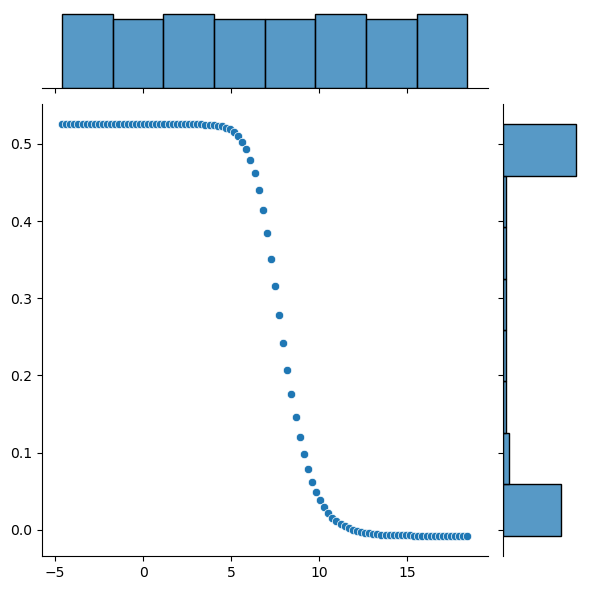

In [64]:
sns.jointplot(x=np.log(param_range), y=test_mean)

* Find where the mean is max

In [65]:
np.where(test_mean == max(test_mean))

(array([26]),)

In [66]:
param_range[26]

4.229242874389499

In [67]:
lm_r_best = Ridge(alpha = param_range[26])

In [68]:
lm_r_best.fit(x_train_s, y_train)

Ridge(alpha=4.229242874389499)

In [69]:
r2_score(y_test, lm_r_best.predict(x_test_s))

0.5355126829801344

* As we can see there's no improvement in the r2 score after selecting the best lamda. So lets try other models.

# Regression tree

* Lets start with a simple regression tree

In [70]:
import matplotlib.pyplot as plt

In [71]:
from sklearn import tree

In [72]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [73]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [74]:
y_train_pred = regtree.predict(x_train)
y_test_pred = regtree.predict(x_test)

In [75]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
mean_squared_error(y_test, y_test_pred)

60424631.02613475

In [78]:
r2_score(y_test, y_test_pred)

0.5927831611924911

* using regtree has increased the r2 score upto 0.59 which is a good hike to the r2 score of ridge regression
* Now we can plot the tree

In [79]:
dot_data = tree.export_graphviz(regtree, out_file=None)

In [80]:
from IPython.display import Image
import pydotplus

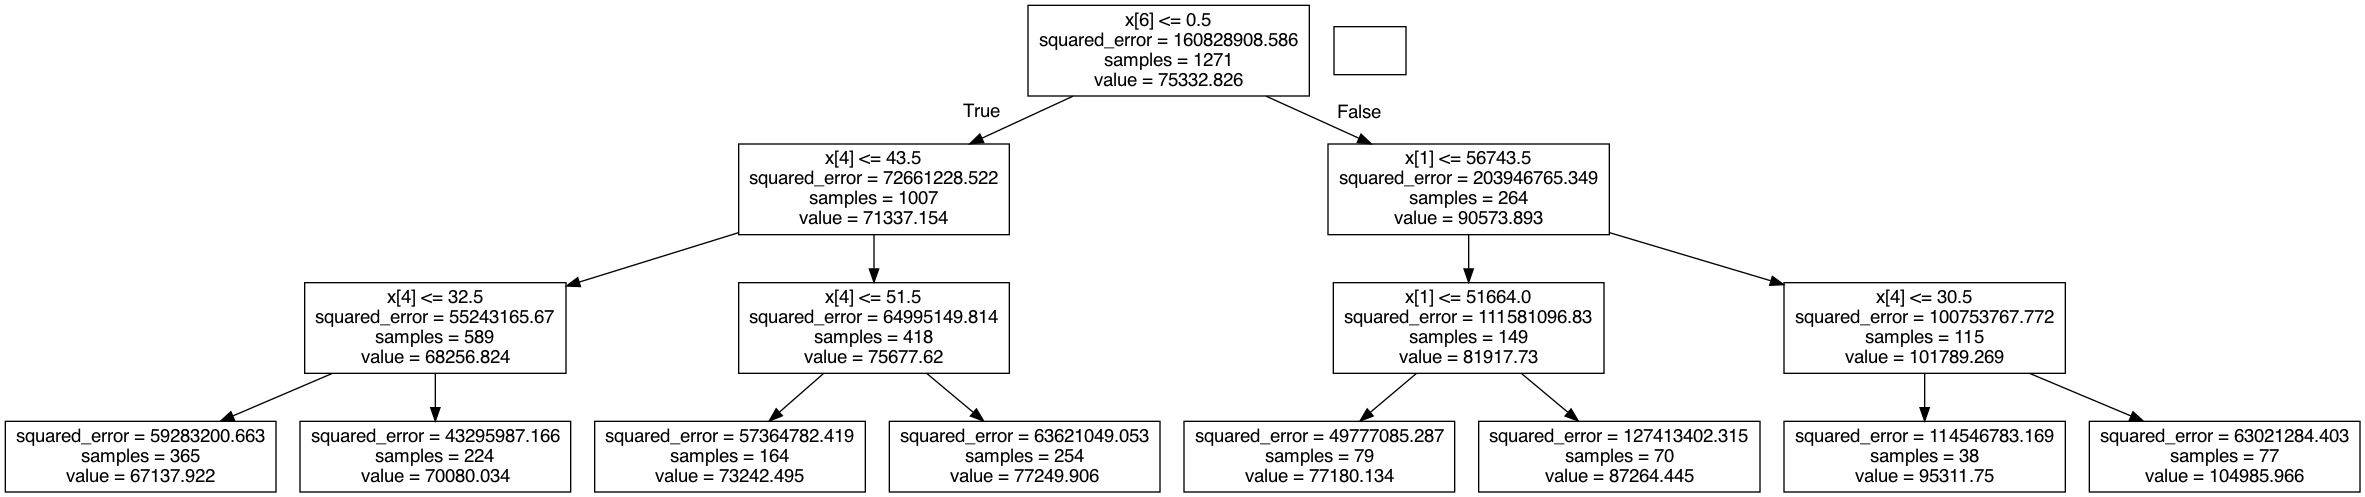

In [81]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest

* to improve the perfomance of our model lets try the ensemble techniques.
* we are starting with random forest since bagging creates correlated trees

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf_regressor = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [84]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [85]:
r2_score(y_test, rf_regressor.predict(x_test))

0.659231079686029

* Using Random forest improves the r2 score upto 0.65.
* we can use grid search to find optimal hyperparameters for regressor

# Grid search

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
rf_regressor = RandomForestRegressor(n_estimators= 250, random_state=0)

In [88]:
params_grid = {"max_features" : [4,5,6,7,8],
              "min_samples_split" : [2,3,10]}

In [89]:
grid_search = GridSearchCV(rf_regressor, params_grid,
                           n_jobs = -1, cv=5, scoring='r2')

In [90]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=250, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 10]},
             scoring='r2')

In [91]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 3}

In [92]:
cvrf_regressor = grid_search.best_estimator_ 

In [93]:
r2_score(y_test,cvrf_regressor.predict(x_test))

0.6574749691893454

* Grid search did not improve the r2 score. 
* Lets try boosting for a higher r2 score.


# Boosting

* Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

In [95]:
gbr_regressor = GradientBoostingRegressor(learning_rate = 0.1, n_estimators=5000, max_depth = 5)

In [96]:
gbr_regressor.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=5000)

In [97]:
r2_score(y_test, gbr_regressor.predict(x_test))

0.6219827228731603

* ADA boost

In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [99]:
ada_regressor = AdaBoostRegressor(learning_rate=0.1, n_estimators=5000)

In [100]:
ada_regressor.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=5000)

In [101]:
r2_score(y_test,ada_regressor.predict(x_test) )

0.5979680223830799

* XG Boost

In [102]:
import xgboost as xgb

In [103]:
xgb_regressor = xgb.XGBRegressor(max_depth=7, n_estimators=10000, learning_rate=0.1, n_jobs=-1)

In [104]:
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [105]:
r2_score(y_test,xgb_regressor.predict(x_test) )

0.6639045784062503

* XG boost is giving the highest r2 score. Hence we will use XGBRegressor as the final model

# Final Questions

### 1. Your views about the problem statement?
The problem statement is well-defined and addresses a real-world scenario where TechWorks Consulting needs to predict employee salaries. It also provides the regression task which would result in fair compensation to IT professionals. By using machine learning to determine salary, TechWorks Consulting can leverage historical data and various employee attributes to make informed, data-driven decisions. 


### 2. What will be your approach to solving this task?
My approach to solve the provided task will inlcude following steps:
* Importing data
* Data Exploration
* Preprocessing (outlier treatment, missing value imputation, dummy variable creation, Bi- variate analysis)
* Using simple models and trying to improve them
* Using ensemble methods and improving results


### 3. What were the available ML model options you had to perform this task?
Available options to solve the given task are:
* Linear Regression
* Ridge and Lasso
* Regression Trees
* Bagging
* Boosting (Gradient, Ada, XGboost)
* Random Forest

### 4. Which model’s performance is best and what could be the possible reason for that?
XGBoost showed the best performance. The reasons the same can be as follows:
* Regularization Techniques: XGBoost provides options for regularization techniques like L1 (Lasso) and L2 (Ridge) regularization. These techniques help prevent overfitting, which is crucial when dealing with datasets that may have noise or outliers.
* Feature Importance: XGBoost can calculate feature importance scores, which indicate the contribution of each feature to the model's predictions. This helps in understanding which employee attributes are most influential in determining salary. TechWorks Consulting can use this information for decision-making and transparency.


### 5. What steps can you take to improve this selected model’s performance even further?
To improve the models performance we use following steps:
* Tuning Hyperparameters
* Using Ridge and Lasso to prevent overfitting
* Using validation curve to find the best Lamda
* Using ensemble techniques like bagging boosting and random forest
* Using Grid search